In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from numpy import linalg as la

In [118]:

X1  = np.random.uniform(-10,10,400)
X2  = np.random.uniform(-10,10,400)
mean = 0
var = 0.01
eps = np.random.normal(loc=mean, scale=var, size=1)  #gaussian noise
X1 = X1 - X1.mean()
X2 = X2 - X2.mean()
X_org = np.column_stack((X1,X2))
Y = 3*(X1) + 4*(X2) + eps 


X = X_org

print(X.shape)

(400, 2)


In [119]:
class LinearRegressor():
    def __init__(self, lr, itrs, tol=0.1):
        self.lr = lr
        self.itrs = itrs
        self.W = None
        self.tol = tol

    def GD_fit(self, X, Y):
        n, f = np.shape(X)
        self.W = np.ones(f)
        mse_arr = []
        w_arr = []
        cost_arr = []
        for i in range(self.itrs):
            errs = np.dot(X,self.W) - Y
            cost = np.sum(errs**2) / (2*n)
            mse = np.sum(errs**2) / n
            gradient = np.dot(X.T, errs) / n
            self.W = self.W - self.lr*gradient
            cost_arr.append(cost)
            mse_arr.append(mse)
            w_arr.append(self.W)
            if cost <= self.tol:
                print("Converged at ITR",i)
                break
        return np.array(mse_arr), np.array(w_arr), np.array(cost_arr)


In [120]:
def gradient_desc(W, x, y):
    y_hat = x.dot(W).flatten()
    error = (y - y_hat)
    mse = (1.0 / len(x)) * np.sum(np.square(error))
    gradient = -(1.0 / len(x)) * error.dot(x)
    return gradient, mse


def plot_diagram(w_hist_org, mse_hist_org, cost_hist_org):
    plt.plot(range(len(mse_hist_org)), mse_hist_org, label = "MSE", color='blue')
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.title('MSE Plot')
    plt.legend()
    plt.show()

    plt.plot(range(len(cost_hist_org)), cost_hist_org, label = "Cost", color='blue')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Plot')
    plt.legend()
    plt.show()

    mse_hist, w_hist, cost_hist = [], [] ,[] 
    for i in range(len(mse_hist_org)):
        if i%50 == 0 or i==len(mse_hist_org)-1:
            mse_hist.append(mse_hist_org[i])
            cost_hist.append(cost_hist_org[i])
            w_hist.append(w_hist_org[i])

    mse_hist = np.array(mse_hist)
    w_hist = np.array(w_hist)
    cost_hist = np.array(cost_hist)
    
    levels = np.sort(mse_hist)
    w0 = np.linspace(-w_hist[-1,0]*3 , w_hist[-1,0]*3 , 100)
    w1 = np.linspace(-w_hist[-1,1]*3 , w_hist[-1,1]*3 , 100)
    mse_vals = np.zeros(shape=(w0.size, w1.size))

    for i, value1 in enumerate(w0):
        for j, value2 in enumerate(w1):
            w_temp = np.array((value1,value2))        
            mse_vals[i, j] = gradient_desc(w_temp, X, Y)[1]
            
    plt.contourf(w0, w1, mse_vals, levels,alpha=.7)
    plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
    plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
    for i in range(len(w_hist) - 1):
        plt.annotate('', xy=w_hist[i + 1, :], xytext=w_hist[i, :], arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1}, va='center', ha='center')

    CS = plt.contour(w0, w1, mse_vals, levels, linewidths=0.2,colors='black')
    plt.clabel(CS, inline=1, fontsize=0)
    plt.title("Contour Plot of Gradient Descent")
    plt.xlabel("w0")
    plt.ylabel("w1")
    plt.show()


W: [1.95806666 2.43391789]
MSE after training: 115.16569124951475
Cost after training: 57.582845624757375


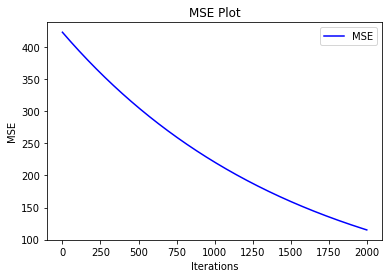

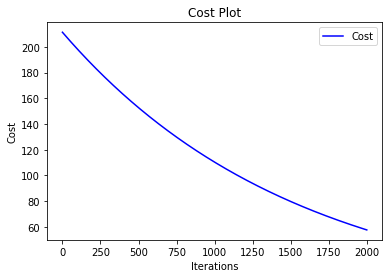

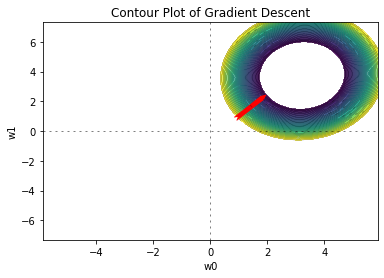

In [121]:
itrs = 2000
lrgd = LinearRegressor(lr=0.00001,itrs=itrs,tol=0.001)  
mse_hist, w_hist, cost_hist = lrgd.GD_fit(X, Y)

print("W:",w_hist[-1])
print("MSE after training:",mse_hist[-1])
print("Cost after training:",cost_hist[-1])

plot_diagram(w_hist, mse_hist, cost_hist)

Optimum learning rate is calculated as the inverse of the maximum eigne value of the hessian matrix. We expand and take double derivative of the cost function and obtain the hessian matrix as : 2*X.T*X  
$ \eta = 1/\lambda_{max} $

In [122]:
H2 = np.matmul(X.T,X)
print(H2)
ev2, _ = la.eig(H2)
ev_max2 = np.max(ev2)
print(ev2,ev_max2)
opt_lr2 = 2 / ev_max2
print("Optimal lr",opt_lr2)

[[13938.05853749  -598.58453683]
 [ -598.58453683 13397.2392719 ]]
[14324.47827161 13010.81953777] 14324.478271605745
Optimal lr 0.00013962114096430572


Converged at ITR 1354
W: [2.9958514  3.99368375]
MSE after training: 0.0019885173955641283
Cost after training: 0.0009942586977820642


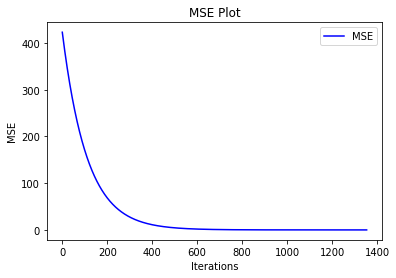

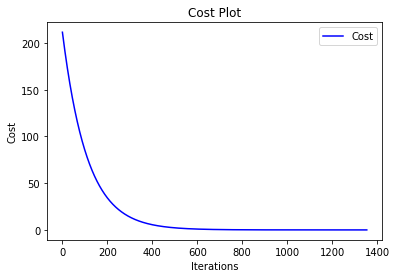

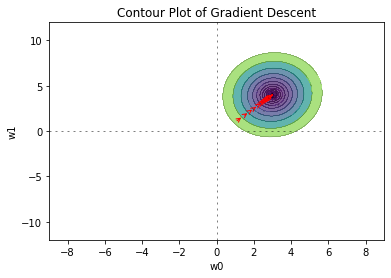

In [123]:
itrs = 2000
lrgd = LinearRegressor(lr=opt_lr2,itrs=itrs,tol=0.001)  # using optimal LR
mse_hist, w_hist, cost_hist = lrgd.GD_fit(X, Y)

print("W:",w_hist[-1])
print("MSE after training:",mse_hist[-1])
print("Cost after training:",cost_hist[-1])

plot_diagram(w_hist, mse_hist, cost_hist)

New LR: 6.282951343393758e-05
W: [2.96682478 3.94969417]
MSE after training: 0.11871399629142637
Cost after training: 0.059356998145713186


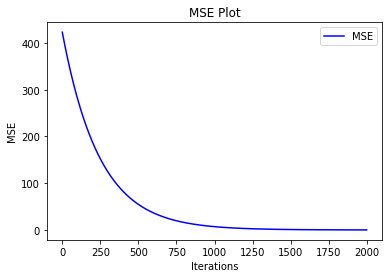

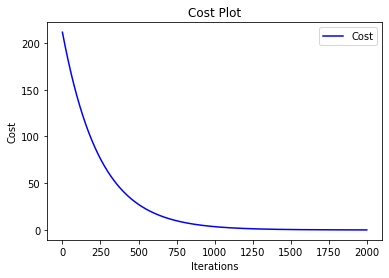

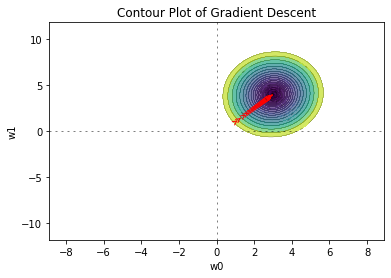

In [124]:
lr1 = 0.9 * opt_lr2 * 0.5
print("New LR:",lr1)

itrs = 2000
lrgd = LinearRegressor(lr=lr1,itrs=itrs,tol=0.001) 
mse_hist, w_hist, cost_hist = lrgd.GD_fit(X, Y)

print("W:",w_hist[-1])
print("MSE after training:",mse_hist[-1])
print("Cost after training:",cost_hist[-1])

plot_diagram(w_hist, mse_hist, cost_hist)

New LR: 0.0001047158557232293
Converged at ITR 1806
W: [2.99584151 3.99366876]
MSE after training: 0.0019931522272951894
Cost after training: 0.0009965761136475947


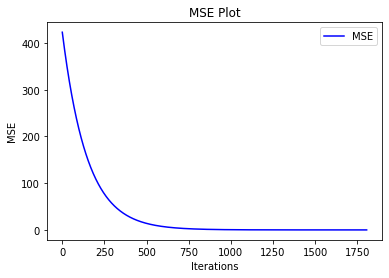

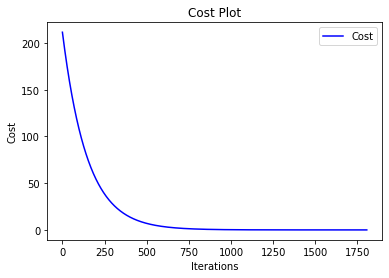

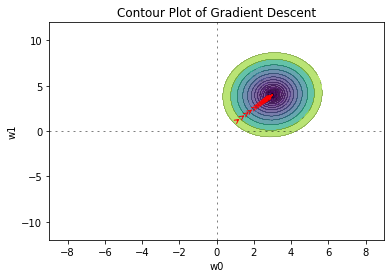

In [125]:
lr2 = 1.5 * opt_lr2 * 0.5
print("New LR:",lr2)

itrs = 2000
lrgd = LinearRegressor(lr=lr2,itrs=itrs,tol=0.001)  
mse_hist, w_hist, cost_hist = lrgd.GD_fit(X, Y)

print("W:",w_hist[-1])
print("MSE after training:",mse_hist[-1])
print("Cost after training:",cost_hist[-1])

plot_diagram(w_hist, mse_hist, cost_hist)

New LR: 0.0002094317114464586
Converged at ITR 902
W: [2.99587117 3.99371371]
MSE after training: 0.00197925124941649
Cost after training: 0.000989625624708245


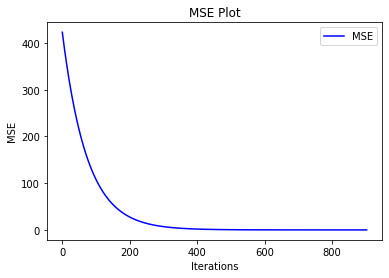

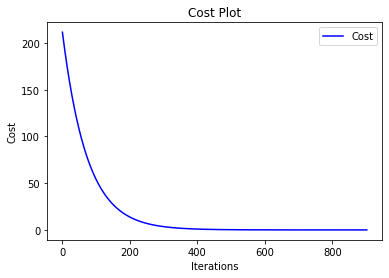

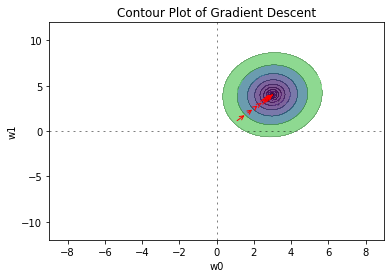

In [126]:
lr3 = 1.5 * opt_lr2
print("New LR:",lr3)

itrs = 2000
lrgd = LinearRegressor(lr=lr3,itrs=itrs,tol=0.001)  
mse_hist, w_hist, cost_hist = lrgd.GD_fit(X, Y)

print("W:",w_hist[-1])
print("MSE after training:",mse_hist[-1])
print("Cost after training:",cost_hist[-1])

plot_diagram(w_hist, mse_hist, cost_hist)

Divergence example
New LR: 0.1
W: [-1.02792305e+81  6.63581714e+80]
MSE after training: 8.046641546919026e+162
Cost after training: 4.023320773459513e+162


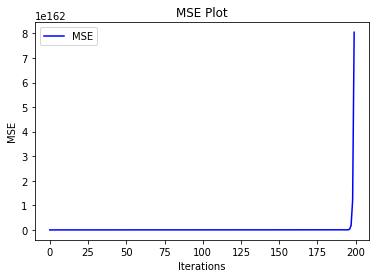

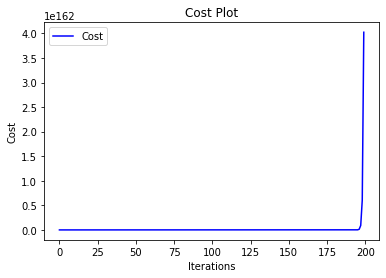

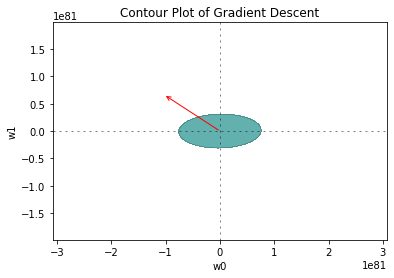

In [127]:
print('Divergence example')
lr3 = 0.1
print("New LR:",lr3)

itrs = 200
lrgd = LinearRegressor(lr=lr3,itrs=itrs,tol=0.001)  # the lower the learning rate, the slower is the convergence
mse_hist, w_hist, cost_hist = lrgd.GD_fit(X, Y)

print("W:",w_hist[-1])
print("MSE after training:",mse_hist[-1])
print("Cost after training:",cost_hist[-1])

plot_diagram(w_hist, mse_hist, cost_hist)

Linear regression converged faster on using optimum step size (or little higher) whereas without it we can see that the cost after 2K iterations is higher.  
Also we can see that if the step size is huge linear regression diverges.